Quick Introduction to this Dataset
==================================

**Simple but informative** -- that's the goal of this dataset.  

This kernel will demonstrate the following:

 - Loading the data
 - Google maps
 - Pivot table
 - Simple graphs
 - Percent change
 - Seaborn heatmap



Loading Data
------------


In [1]:
import pandas as pd
import numpy as np
import datetime


import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)


dateparse = lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')

# Read data 
d=pd.read_csv("C:/ProgramData/Anaconda3/projects/911.csv",
    header=0,names=['lat', 'lng','desc','zip','title','timeStamp','twp','addr','e'],
    dtype={'lat':str,'lng':str,'desc':str,'zip':str,
                  'title':str,'timeStamp':str,'twp':str,'addr':str,'e':int}, 
     parse_dates=['timeStamp'],date_parser=dateparse)


# Set index
d.index = pd.DatetimeIndex(d.timeStamp)
d=d[(d.timeStamp >= "2016-01-01 00:00:00")]

In [2]:
d.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
timeStamp,,,,,,,,,
2016-01-01 00:10:08,40.1213543,-75.3638292,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1
2016-01-01 00:14:45,40.1405049,-75.3108737,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1
2016-01-01 00:20:43,40.2468373,-75.6813814,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1
2016-01-01 00:25:30,40.0972222,-75.3761952,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1
2016-01-01 00:30:28,40.1484317,-75.2198118,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1


In [3]:
# Title is the category of the call
d["title"].value_counts()

Traffic: VEHICLE ACCIDENT -             41949
Traffic: DISABLED VEHICLE -             13225
Fire: FIRE ALARM                        10082
EMS: RESPIRATORY EMERGENCY               9395
EMS: FALL VICTIM                         9062
EMS: CARDIAC EMERGENCY                   9060
EMS: VEHICLE ACCIDENT                    7141
Traffic: ROAD OBSTRUCTION -              5539
EMS: SUBJECT IN PAIN                     5061
EMS: HEAD INJURY                         4699
EMS: UNKNOWN MEDICAL EMERGENCY           3284
EMS: SYNCOPAL EPISODE                    3171
EMS: SEIZURES                            3048
Fire: VEHICLE ACCIDENT                   3013
EMS: GENERAL WEAKNESS                    2780
EMS: ALTERED MENTAL STATUS               2641
EMS: ABDOMINAL PAINS                     2602
Fire: FIRE INVESTIGATION                 2554
EMS: MEDICAL ALERT ALARM                 2485
EMS: HEMORRHAGING                        2316
EMS: OVERDOSE                            2296
EMS: UNCONSCIOUS SUBJECT          

## Maps ##

If you're interested in making a Google map take a look at this  [kernel][1]

Here's the [code][2] to create this map. 


![Google Maps on Kaggle][3]


  [1]: https://www.kaggle.com/mchirico/d/mchirico/montcoalert/map-of-helicopter-landings
  [2]: https://www.kaggle.com/mchirico/d/mchirico/montcoalert/map-of-helicopter-landings/code
  [3]: https://raw.githubusercontent.com/mchirico/mchirico.github.io/master/p/images/kaggleGoogleMap.png

## Working with the Data ##

In [4]:
# There are 3 groups -- EMS, Fire, Traffic
# We'll call these type.  This type is split on ':'
d['type'] = d["title"].apply(lambda x: x.split(':')[0])

In [5]:
d["type"].value_counts()

EMS        90147
Traffic    63679
Fire       27009
Name: type, dtype: int64



Pivot Table
-----------


In [6]:
# Let's create a pivot table with just EMS
# It will be stored in a variable 'pp'
g=d[d['type'] == 'EMS' ]
p=pd.pivot_table(g, values='e', index=['timeStamp'], columns=['title'], aggfunc=np.sum)

# Resampling every week 'W'.  This is very powerful
pp=p.resample('W', how=[np.sum]).reset_index()
pp.head()

,timeStamp,EMS: ABDOMINAL PAINS,EMS: ACTIVE SHOOTER,EMS: ALLERGIC REACTION,EMS: ALTERED MENTAL STATUS,EMS: AMPUTATION,EMS: ANIMAL BITE,EMS: APPLIANCE FIRE,EMS: ARMED SUBJECT,EMS: ASSAULT VICTIM,...,EMS: TRANSFERRED CALL,EMS: TRASH/DUMPSTER FIRE,EMS: UNCONSCIOUS SUBJECT,EMS: UNKNOWN MEDICAL EMERGENCY,EMS: UNKNOWN TYPE FIRE,EMS: UNRESPONSIVE SUBJECT,EMS: VEHICLE ACCIDENT,EMS: VEHICLE FIRE,EMS: WARRANT SERVICE,EMS: WOODS/FIELD FIRE
,,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,2016-01-03,19.0,NaN,5.0,13.0,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,14.0,11.0,1.0,17.0,34.0,1.0,NaN,NaN
1,2016-01-10,43.0,NaN,8.0,46.0,NaN,2.0,1.0,NaN,19.0,...,NaN,NaN,23.0,57.0,NaN,38.0,102.0,1.0,NaN,NaN
2,2016-01-17,42.0,NaN,8.0,33.0,1.0,1.0,NaN,NaN,10.0,...,NaN,NaN,24.0,49.0,NaN,33.0,128.0,1.0,NaN,NaN
3,2016-01-24,45.0,NaN,11.0,37.0,3.0,5.0,NaN,NaN,4.0,...,NaN,NaN,24.0,51.0,NaN,44.0,85.0,NaN,NaN,NaN
4,2016-01-31,37.0,NaN,13.0,31.0,NaN,NaN,NaN,NaN,16.0,...,1.0,NaN,33.0,47.0,NaN,34.0,74.0,NaN,NaN,NaN


In [7]:
# That "sum" column is a pain...remove it

# Let's flatten the columns 
pp.columns = pp.columns.get_level_values(0)

pp.head()

,timeStamp,EMS: ABDOMINAL PAINS,EMS: ACTIVE SHOOTER,EMS: ALLERGIC REACTION,EMS: ALTERED MENTAL STATUS,EMS: AMPUTATION,EMS: ANIMAL BITE,EMS: APPLIANCE FIRE,EMS: ARMED SUBJECT,EMS: ASSAULT VICTIM,...,EMS: TRANSFERRED CALL,EMS: TRASH/DUMPSTER FIRE,EMS: UNCONSCIOUS SUBJECT,EMS: UNKNOWN MEDICAL EMERGENCY,EMS: UNKNOWN TYPE FIRE,EMS: UNRESPONSIVE SUBJECT,EMS: VEHICLE ACCIDENT,EMS: VEHICLE FIRE,EMS: WARRANT SERVICE,EMS: WOODS/FIELD FIRE
0,2016-01-03,19.0,NaN,5.0,13.0,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,14.0,11.0,1.0,17.0,34.0,1.0,NaN,NaN
1,2016-01-10,43.0,NaN,8.0,46.0,NaN,2.0,1.0,NaN,19.0,...,NaN,NaN,23.0,57.0,NaN,38.0,102.0,1.0,NaN,NaN
2,2016-01-17,42.0,NaN,8.0,33.0,1.0,1.0,NaN,NaN,10.0,...,NaN,NaN,24.0,49.0,NaN,33.0,128.0,1.0,NaN,NaN
3,2016-01-24,45.0,NaN,11.0,37.0,3.0,5.0,NaN,NaN,4.0,...,NaN,NaN,24.0,51.0,NaN,44.0,85.0,NaN,NaN,NaN
4,2016-01-31,37.0,NaN,13.0,31.0,NaN,NaN,NaN,NaN,16.0,...,1.0,NaN,33.0,47.0,NaN,34.0,74.0,NaN,NaN,NaN




Graphs/Plots
------


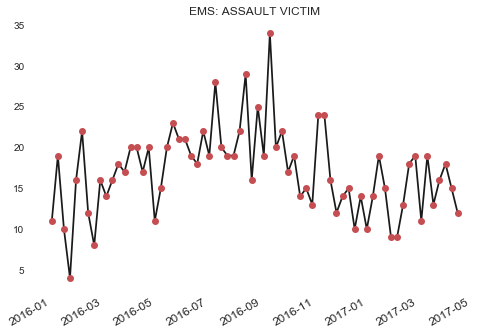

In [8]:
# Red dot with Line
fig, ax = plt.subplots()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  



ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 



ax.plot_date(pp['timeStamp'], pp['EMS: ASSAULT VICTIM'],'k')
ax.plot_date(pp['timeStamp'], pp['EMS: ASSAULT VICTIM'],'ro')


ax.set_title("EMS: ASSAULT VICTIM")
fig.autofmt_xdate()
plt.show()

# Note, you'll get a drop at the ends...not a complete week

In [9]:
# Remove the first and last row
pp = pp[pp['timeStamp'] < pp['timeStamp'].max()]
pp = pp[pp['timeStamp'] > pp['timeStamp'].min()]

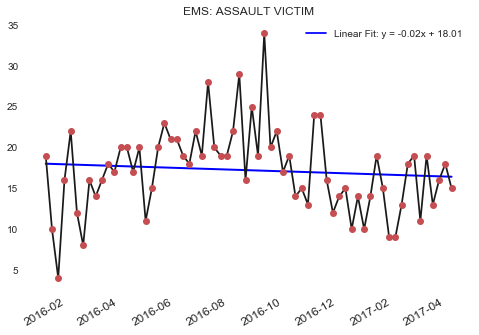

In [10]:
# Get the best fitting line

# Need to import for legend
import matplotlib.lines as mlines

# For best fit line
from sklearn import linear_model

# Red dot with Line
fig, ax = plt.subplots()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  



ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 



# Build Linear Fit
Y = pp['EMS: ASSAULT VICTIM'].values.reshape(-1,1)
X=np.arange(Y.shape[0]).reshape(-1,1)
model = linear_model.LinearRegression()
model.fit(X,Y)
m = model.coef_[0][0]
c = model.intercept_[0]
ax.plot(pp['timeStamp'],model.predict(X), color='blue',
         linewidth=2)
blue_line = mlines.Line2D([], [], color='blue', label='Linear Fit: y = %2.2fx + %2.2f' % (m,c))
ax.legend(handles=[blue_line], loc='best')


ax.plot_date(pp['timeStamp'], pp['EMS: ASSAULT VICTIM'],'k')
ax.plot_date(pp['timeStamp'], pp['EMS: ASSAULT VICTIM'],'ro')


ax.set_title("EMS: ASSAULT VICTIM")
fig.autofmt_xdate()
plt.show()

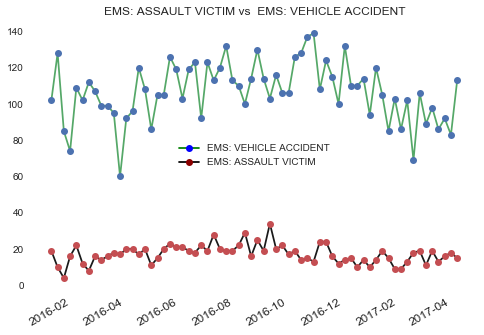

In [11]:

# Need to import for legend
import matplotlib.lines as mlines

fig, ax = plt.subplots()

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  


ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
plt.xticks(fontsize=12) 


ax.plot_date(pp['timeStamp'], pp['EMS: ASSAULT VICTIM'],'k')
ax.plot_date(pp['timeStamp'], pp['EMS: ASSAULT VICTIM'],'ro')


ax.plot_date(pp['timeStamp'], pp['EMS: VEHICLE ACCIDENT'],'g')
ax.plot_date(pp['timeStamp'], pp['EMS: VEHICLE ACCIDENT'],'bo')


ax.set_title("EMS: ASSAULT VICTIM vs  EMS: VEHICLE ACCIDENT")


# Legend Stuff
green_line = mlines.Line2D([], [], color='green', marker='o',markerfacecolor='blue',
                          markersize=7, label='EMS: VEHICLE ACCIDENT')
black_line = mlines.Line2D([], [], color='black', marker='o',markerfacecolor='darkred',
                          markersize=7, label='EMS: ASSAULT VICTIM')

ax.legend(handles=[green_line,black_line], loc='best')


fig.autofmt_xdate()
plt.show()

# Note scale hides the assault increase 

## Functions -- Probably more useful ##

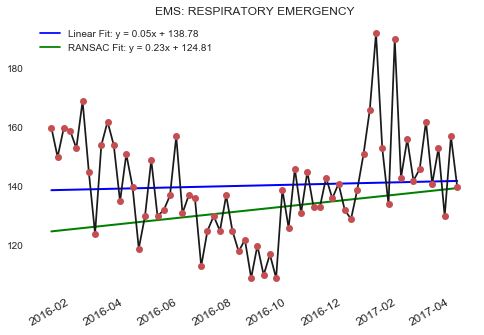

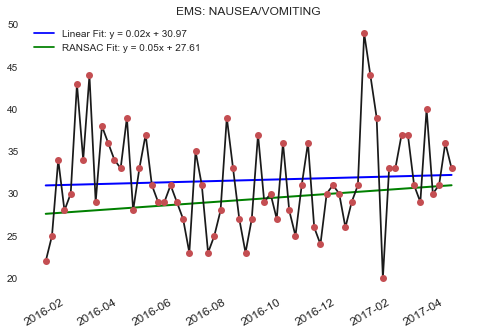

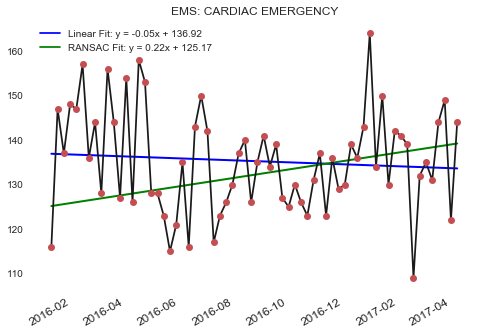

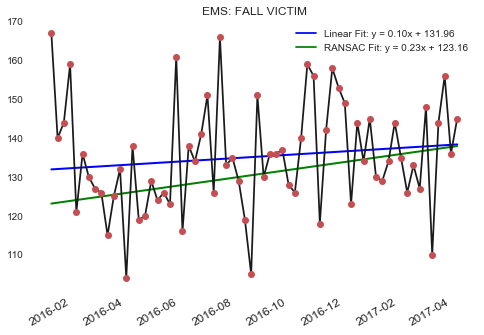

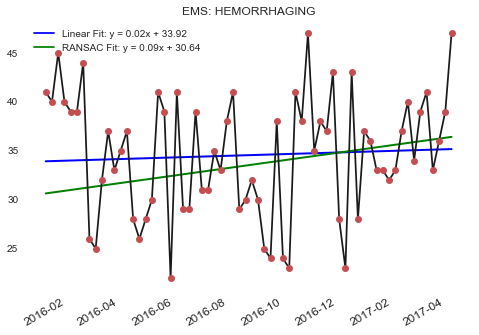

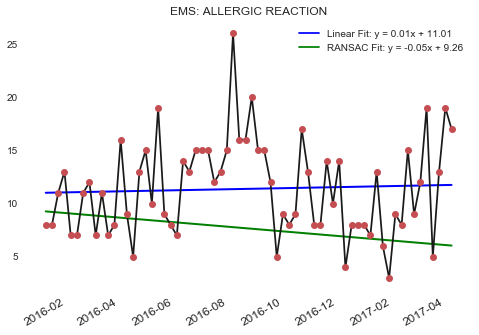

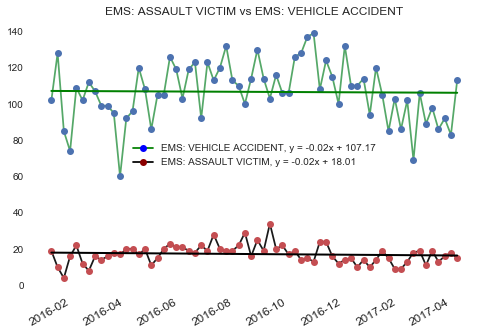

In [12]:
from sklearn import linear_model
import matplotlib.lines as mlines

def plotWLine(category='EMS: ASSAULT VICTIM'):

    
    fig, ax = plt.subplots()

    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)  



    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left() 
    plt.xticks(fontsize=12) 



    # Build Linear Fit
    Y = pp[category].values.reshape(-1,1)
    X=np.arange(Y.shape[0]).reshape(-1,1)
    model = linear_model.LinearRegression()
    model.fit(X,Y)
    m = model.coef_[0][0]
    c = model.intercept_[0]
    ax.plot(pp['timeStamp'],model.predict(X), color='blue',
             linewidth=2)
    blue_line = mlines.Line2D([], [], color='blue', label='Linear Fit: y = %2.2fx + %2.2f' % (m,c))
    

    
    # Robustly fit linear model with RANSAC algorithm
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression(),random_state=23)
    model_ransac.fit(X, Y)
    mr = model_ransac.estimator_.coef_[0][0]
    cr = model_ransac.estimator_.intercept_[0]
    ax.plot(pp['timeStamp'],model_ransac.predict(X), color='green',
             linewidth=2)
    green_line = mlines.Line2D([], [], color='green', label='RANSAC Fit: y = %2.2fx + %2.2f' % (mr,cr))


    
    ax.legend(handles=[blue_line,green_line], loc='best')
    

    ax.plot_date(pp['timeStamp'], pp[category],'k')
    ax.plot_date(pp['timeStamp'], pp[category],'ro')


    ax.set_title(category)
    fig.autofmt_xdate()
    plt.show()
    print('\n')


    
def plot2WLine(cat1='EMS: ASSAULT VICTIM',cat2='EMS: VEHICLE ACCIDENT'):
    
    fig, ax = plt.subplots()

    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)  



    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left() 
    plt.xticks(fontsize=12) 

    

    ax.plot_date(pp['timeStamp'], pp[cat1],'k')
    ax.plot_date(pp['timeStamp'], pp[cat1],'ro')


    ax.plot_date(pp['timeStamp'], pp[cat2],'g')
    ax.plot_date(pp['timeStamp'], pp[cat2],'bo')


    
    
# Build Linear Fit
    
    # cat 1
    Y = pp[cat1].values.reshape(-1,1)
    X=np.arange(Y.shape[0]).reshape(-1,1)
    model = linear_model.LinearRegression()
    model.fit(X,Y)
    m = model.coef_[0][0]
    c = model.intercept_[0]
    ax.plot(pp['timeStamp'],model.predict(X), color='black',
             linewidth=2)
    
    black_line = mlines.Line2D([], [], color='black', marker='o',markerfacecolor='darkred',
                               markersize=7,
                               label='%s, y = %2.2fx + %2.2f' % (cat1,m,c))
  
    # cat 2
    Y = pp[cat2].values.reshape(-1,1)
    X=np.arange(Y.shape[0]).reshape(-1,1)
    model = linear_model.LinearRegression()
    model.fit(X,Y)
    m = model.coef_[0][0]
    c = model.intercept_[0]
    ax.plot(pp['timeStamp'],model.predict(X), color='green',
             linewidth=2)
    
    green_line = mlines.Line2D([], [], color='green',marker='o',markerfacecolor='blue',
                          markersize=7, label='%s, y = %2.2fx + %2.2f' % (cat2,m,c))
  
 
    
    ax.set_title(cat1 + ' vs ' + cat2)
    ax.legend(handles=[green_line,black_line], loc='best')

    fig.autofmt_xdate()
    plt.show()
    print('\n')
       
    
# Create some plots
plotWLine('EMS: RESPIRATORY EMERGENCY')
plotWLine('EMS: NAUSEA/VOMITING')
plotWLine('EMS: CARDIAC EMERGENCY')
plotWLine('EMS: FALL VICTIM')
plotWLine('EMS: HEMORRHAGING')
plotWLine('EMS: ALLERGIC REACTION')






plot2WLine(cat1='EMS: ASSAULT VICTIM',cat2='EMS: VEHICLE ACCIDENT')



Percent Change
--------------


In [13]:
# Get percent change
pp['EMS: ASSAULT VICTIM pc']=pp[('EMS: ASSAULT VICTIM')].pct_change(periods=1)

pp[['timeStamp','EMS: ASSAULT VICTIM pc','EMS: ASSAULT VICTIM']].head(6)

,timeStamp,EMS: ASSAULT VICTIM pc,EMS: ASSAULT VICTIM
1,2016-01-10,NaN,19.0
2,2016-01-17,-0.473684,10.0
3,2016-01-24,-0.600000,4.0
4,2016-01-31,3.000000,16.0
5,2016-02-07,0.375000,22.0
6,2016-02-14,-0.454545,12.0


## Seaborn Heatmap ##

In [14]:
# Vehicle Accident -- yes, there is FIRE; maybe we should have include?
# Put this in a variable 'g'
g = d[(d.title.str.match(r'EMS:.*VEHICLE ACCIDENT.*') | d.title.str.match(r'Traffic:.*VEHICLE ACCIDENT.*'))]
g['Month'] = g['timeStamp'].apply(lambda x: x.strftime('%m %B'))
g['Hour'] = g['timeStamp'].apply(lambda x: x.strftime('%H'))
p=pd.pivot_table(g, values='e', index=['Month'] , columns=['Hour'], aggfunc=np.sum)
p.head()

Hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
01 January,90,53,51,49,43,73,255,347,438,290,...,386,423,442,548,468,302,230,209,125,104
02 February,58,54,45,26,20,94,192,355,324,295,...,359,448,449,425,430,279,167,130,88,89
03 March,54,60,62,33,36,52,168,353,333,326,...,410,518,543,458,367,251,190,139,103,83
04 April,49,25,35,23,38,38,100,218,242,222,...,328,393,402,386,271,162,138,94,66,58
05 May,46,38,28,16,20,36,83,153,198,185,...,232,264,280,326,195,111,113,109,86,66


In [15]:
cmap = sns.cubehelix_palette(light=2, as_cmap=True)
ax = sns.heatmap(p,cmap = cmap)
ax.set_title('Vehicle  Accidents - All Townships ');